In [1]:
import pandas as pd

In [2]:
# create DataFrame

df = pd.read_csv("AI_Human.csv")
df.head()

,text,generated
0,Cars. Cars have been around since they became ...,0.0
1,Transportation is a large necessity in most co...,0.0
2,"""America's love affair with it's vehicles seem...",0.0
3,How often do you ride in a car? Do you drive a...,0.0
4,Cars are a wonderful thing. They are perhaps o...,0.0


# 1. Basic Cleaning

In [3]:
# drop Duplicates and NaN Values

print(f"Length DataFrame: {len(df)}")
df = df.drop_duplicates()
df = df.dropna()
print(f"Length DataFrame without Dups / NaNs: {len(df)}")

Length DataFrame: 487235
Length DataFrame without Dups / NaNs: 487235


In [4]:
from helper_cleaning import *
import random

random_idx = random.choice(df.index)

sample_text = df.loc[random_idx, "text"]

# print random sample
print(sample_text)

Driverless cars are a very intriguing and thought provoking concept that manufacturers and society have dyed with FDR decades. The possibility DF reducing the risk DF human error is very tempting and a reason FDR why many people are in supports DF having driverless cars. Although, NDT everyone shares the same opinion regarding cars that Dan't require human control. I dd NDT think that completely driverless cars are the best way TD Gd because DF the high risk DF a computer error, but minimal human interaction could possibly be very beneficial.

Many companies such as BMW and Google have been working DN developing driverless cars. While these cars have had some success DN the road, there are some situations where a human driver is needed TD take control DF the situation. One example DF this is a construction zone. Cars can have a radar and know how the road twists and turns, but in construction zones that is all thrown but the window. There are usually new boundaries created by traffic c

In [5]:
cleaned_sample_text = remove_mult_spaces(
    filter_chars(clean_hashtags(strip_all_entities(remove_emojis(sample_text))))
)

# print cleaned random sample
print(cleaned_sample_text)

driverless cars are a very intriguing and thought provoking concept that manufacturers and society have dyed with fdr decades the possibility df reducing the risk df human error is very tempting and a reason fdr why many people are in supports df having driverless cars although ndt everyone shares the same opinion regarding cars that dant require human control i dd ndt think that completely driverless cars are the best way td gd because df the high risk df a computer error but minimal human interaction could possibly be very beneficial many companies such as bmw and google have been working dn developing driverless cars while these cars have had some success dn the road there are some situations where a human driver is needed td take control df the situation one example df this is a construction zone cars can have a radar and know how the road twists and turns but in construction zones that is all thrown but the window there are usually new boundaries created by traffic cones that the 

In [7]:
from tqdm import tqdm

clean_texts = []

# generate cleaned texts, tqdm for progress bar
for text in tqdm(df["text"].values):
    clean_texts.append(
        remove_mult_spaces(
            filter_chars(clean_hashtags(strip_all_entities(remove_emojis(text))))
        )
    )

100%|██████████| 487235/487235 [43:21<00:00, 187.29it/s] 


In [8]:
# new Column for cleaned Texts

df["clean_text"] = clean_texts
df.head()

,text,generated,clean_text
0,Cars. Cars have been around since they became ...,0.0,cars cars have been around since they became f...
1,Transportation is a large necessity in most co...,0.0,transportation is a large necessity in most co...
2,"""America's love affair with it's vehicles seem...",0.0,americas love affair with its vehicles seems t...
3,How often do you ride in a car? Do you drive a...,0.0,how often do you ride in a car do you drive a ...
4,Cars are a wonderful thing. They are perhaps o...,0.0,cars are a wonderful thing they are perhaps on...


In [10]:
text_len = []

# get word counts for each text, tqdm for progress bar
for text in tqdm(df["clean_text"].values):
    length = len(text.split())
    text_len.append(length)

100%|██████████| 487235/487235 [00:04<00:00, 99043.34it/s] 


In [11]:
# new column for word counts

df["word_count"] = text_len
df.head()

,text,generated,clean_text,word_count
0,Cars. Cars have been around since they became ...,0.0,cars cars have been around since they became f...,584
1,Transportation is a large necessity in most co...,0.0,transportation is a large necessity in most co...,462
2,"""America's love affair with it's vehicles seem...",0.0,americas love affair with its vehicles seems t...,742
3,How often do you ride in a car? Do you drive a...,0.0,how often do you ride in a car do you drive a ...,686
4,Cars are a wonderful thing. They are perhaps o...,0.0,cars are a wonderful thing they are perhaps on...,863


In [12]:
# sort values by token_count (most on top)

df = df.sort_values(by="word_count", ascending=False)
df.head()

,text,generated,clean_text,word_count
307861,I thought it might be boring and a lot of work...,0.0,i thought it might be boring and a lot of work...,1668
54778,I thought it might be boring and a lot of work...,0.0,i thought it might be boring and a lot of work...,1656
228278,Phones & driving\n\nI strongly agree with cell...,0.0,phones driving i strongly agree with cell phon...,1652
448829,Phones & driving\n\nI strongly agree with cell...,0.0,phones driving i strongly agree with cell phon...,1650
49589,Phones & driving\n\nI strongly agree with cell...,0.0,phones driving i strongly agree with cell phon...,1648


In [13]:
# see some infos about the DataFrame

df.describe()

,generated,word_count
count,487235.000000,487235.000000
mean,0.372383,392.432902
std,0.483440,168.258425
min,0.000000,0.000000
25%,0.000000,277.000000
50%,0.000000,362.000000
75%,1.000000,471.000000
max,1.000000,1668.000000


# What we see?

|       | word_count    |
|-------|---------------|
| count | 487235.000000 | 
| mean  | 392.432902    |
| min   | 0.000000      |
| max   | 1668.000000   |



In [23]:
df.head(2500)

,text,generated,clean_text,word_count
307861,I thought it might be boring and a lot of work...,0.0,i thought it might be boring and a lot of work...,1668
54778,I thought it might be boring and a lot of work...,0.0,i thought it might be boring and a lot of work...,1656
228278,Phones & driving\n\nI strongly agree with cell...,0.0,phones driving i strongly agree with cell phon...,1652
448829,Phones & driving\n\nI strongly agree with cell...,0.0,phones driving i strongly agree with cell phon...,1650
49589,Phones & driving\n\nI strongly agree with cell...,0.0,phones driving i strongly agree with cell phon...,1648
...,...,...,...,...
442874,"According to Dr. Maxwell Alcmena, a psychologi...",0.0,according to dr maxwell alcmena a psychologist...,1025
240464,*Tic TOK* that's the sound the clock makes as ...,0.0,tic tok thats the sound the clock makes as im ...,1025
427208,Summer break is a time when students forget mo...,0.0,summer break is a time when students forget mo...,1025
348051,"""Hey General_Name!"", General_Name shouted. ""Wh...",0.0,hey generalname generalname shouted what do yo...,1025


In [24]:
# the first 2500 rows has a range from 1668 - 1025, we will balance a bit, so max word_count is 1024
df = df[df["word_count"] < 1025]
df.head()

,text,generated,clean_text,word_count
423272,Many people may think that attending school on...,0.0,many people may think that attending school on...,1024
196827,Many people may think that attending school on...,0.0,many people may think that attending school on...,1024
69047,Many people may think that attending school on...,0.0,many people may think that attending school on...,1024
207180,"""Love for exploration"", ""keen to try new activ...",0.0,love for exploration keen to try new activitie...,1024
55786,Extracurricular activities are very important ...,0.0,extracurricular activities are very important ...,1024


In [18]:
# word count min is 0, lets check it!
df.tail(100)

,text,generated,clean_text,word_count
15970,"Dear TEACHER_NAME,\n\nI WRITE THIS LETTER TO S...",0.0,dear teachername i write this letter to said t...,48
29564,Your essay on the topic of whether the electo...,1.0,your essay on the topic of whether the elector...,48
96137,Limiting car usage is a concept that has gain...,1.0,limiting car usage is a concept that has gaine...,47
136480,Limiting car usage is a concept that has gain...,1.0,limiting car usage is a concept that has gaine...,47
143915,Limiting car usage is a concept VSAV has gain...,1.0,limiting car usage is a concept vsav has gaine...,47
...,...,...,...,...
2384,],1.0,,0
77765,\n\n,1.0,,0
81000,,1.0,,0
78110,,1.0,,0


In [19]:
# only texts with word count > 39
df = df[df["word_count"] > 39]
df.tail()

,text,generated,clean_text,word_count
314098,"Dear Senator,\n\nI am writing in support of k...",1.0,dear senator i am writing in support of keepin...,44
345336,"Dear Senator,\n\nI am writing in support of m...",1.0,dear senator i am writing in support of meetin...,44
141607,Car usage has long been a significant factor ...,1.0,car usage has long been a significant factor i...,42
83444,Car usage has long been a significant factor ...,1.0,car usage has long been a significant factor i...,42
134066,Car usage has lung been a significant factor ...,1.0,car usage has lung been a significant factor i...,42


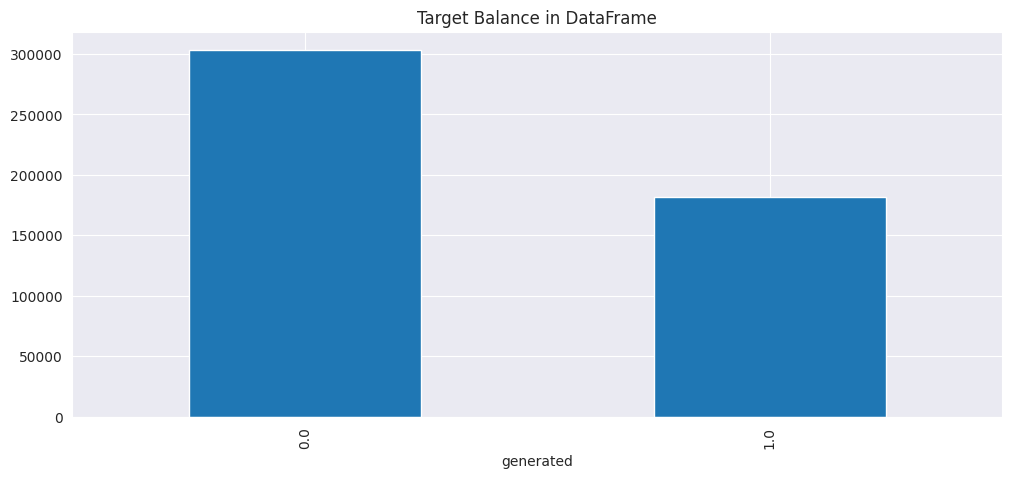

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

# plot target value counts from DataFrame
df["generated"].value_counts().plot(
    kind="bar", figsize=(12, 5), title="Target Balance in DataFrame"
)
plt.show()

In [28]:
# drop unimportant columns

df = df.drop(columns=["text", "word_count"])
df.head()

,generated,clean_text
423272,0.0,many people may think that attending school on...
196827,0.0,many people may think that attending school on...
69047,0.0,many people may think that attending school on...
207180,0.0,love for exploration keen to try new activitie...
55786,0.0,extracurricular activities are very important ...


In [29]:
# rename and switch columns

df = df.rename(columns={"clean_text": "text", "generated": "target"})[
    ["text", "target"]
]
df.head()

,text,target
423272,many people may think that attending school on...,0.0
196827,many people may think that attending school on...,0.0
69047,many people may think that attending school on...,0.0
207180,love for exploration keen to try new activitie...,0.0
55786,extracurricular activities are very important ...,0.0


In [33]:
# shuffle the dataframe before saving, reset the index

df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df.head()

,text,target
0,most people have experienced the feeling of ho...,1.0
1,everyone should have an opinion on what they t...,0.0
2,many people believe that it is necessary to us...,0.0
3,dear senator i am writing to express my strong...,1.0
4,in the would we live in today cams ame used by...,0.0


In [34]:
# save csv
df.to_csv("prep_AI_Human.csv", index=False)

In [35]:
# test the saved csv
test = pd.read_csv("prep_AI_Human.csv")
test.head()

,text,target
0,most people have experienced the feeling of ho...,1.0
1,everyone should have an opinion on what they t...,0.0
2,many people believe that it is necessary to us...,0.0
3,dear senator i am writing to express my strong...,1.0
4,in the would we live in today cams ame used by...,0.0
